# ECE324 Assignment 1 Part 3

_Aman Bhargava_

## Tasks

- [x] Load `pink_lake.png` into variable `image` via `pyplot.imread`. Assume image is in the same directory as `part3.py` (assumed: `part3.py` means `part3.ipynb`).
- [x] Visualize image via `pyplot.imshow` function. Use `pyplot.show` to make it appear until dismissed.
- [x] Add 0.25 to each pixel in `img`. Add _clipping_ functionality to ensure that values remain in the range [0, 1]. Use `numpy.clip`.
    - [x] Save resulting image as `img_add.png` in the same directory as `part3.py` (assumed: `part3.py` means `part3.ipynb`) using `pyplot.imsave`.
- [x] From the original image, create 3 images out of the red, green, blue and channel.
    - _Hint:_ Create array initialized with zeros and copy over specific channel's 2D content from `img`.
    - [x] Save each as `img_chan_0.png`, `img_chan_1.png`, `img_chan_2.png`.
- [x] Convert original image into a greyscale image with governing equation: 
    $$p = 0.299 R + 0.587 G + 0.114 B$$
    - [x] Create `img_gray` with same dimensions as the image. 
    - [x] Output the image in a file called `img_gray.png`.
- [x] Crop the __top half__ of the image and save it as `img_crop.png`.
- [x] Flip the image vertically (flip it around horizontal line that's halfway down the image). Save as `img_flip_vert.png`

## Notes for Reviewers

* I used the `numpy.copy` function in conjunction with array indexing to separate out RGB channels (as opposed to the hint of initializing an array of zeros for each channel).
    * This enabled me to complete the task in fewer lines and more computationally efficiently.
* For the grayscale image, I specified the `'gray'` colormap for diagnostic visualization and for saving the figure.
    * The instructions clearly state that the image should be a _grayscale_ image -- the default color map (`viridis`) produces a blue/green/yellow image.
* For the cropping and flipping tasks, I assumed that the 'image' is the original `image` (not the grayscale image or the single-channel images). 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

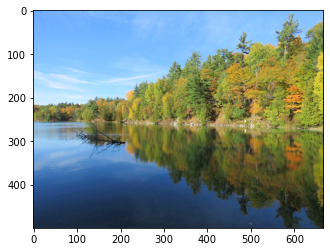

In [4]:
image = plt.imread('pink_lake.png')
plt.imshow(image)
plt.show()

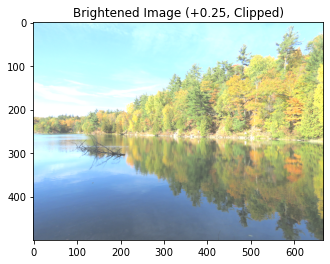

In [6]:
# Brightening the image

bright_image = np.clip(image+0.25, 0, 1)
plt.imshow(bright_image)
plt.title('Brightened Image (+0.25, Clipped)')
plt.show()

# Saving Brightened Image

plt.imsave('img_add.png', bright_image)

In [10]:
# Creating images out of red, green, and blue channels

print('Shape of Image: {}'.format(image.shape)) # For diagnostic purposes, we display the shape of `image` to ensure 
                                                # the 3 color channels (RGB) are in the 3rd dimension as specified.

# numpy.copy is used to ensure that layers are copied via _pass by value_ as opposed to _reference_.
# This is also more efficient and interpretable than using `numpy.zeros` and _THEN_ copying over values.
red = np.copy(image[:,:,0]) 
green = np.copy(image[:,:,1])
blue = np.copy(image[:,:,2])

# Saving images:

plt.imsave('img_chan_0.png', red)
plt.imsave('img_chan_1.png', green)
plt.imsave('img_chan_2.png', blue)

Shape of Image: (500, 667, 3)


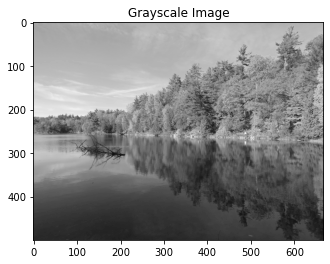

In [17]:
# Converting RGB Channels to Gray Scale Image

img_gray = 0.299 * red + 0.587 * green + 0.114 * blue

# Showing the image for diagnostic purposes
plt.imshow(img_gray, cmap = 'gray')
plt.title('Grayscale Image')
plt.show()

# Saving the image
plt.imsave('img_gray.png', img_gray, cmap='gray') # Since the step 5 of the instructions request that we 
                                                  # 'Convert the original image to a grayscale image',
                                                  # I have specified the 'gray' colormap for the output. 
                                                  # Otherwise, matplotlib defaults to the `viridis` colormap
                                                  # which is _not_ a grayscale image. 

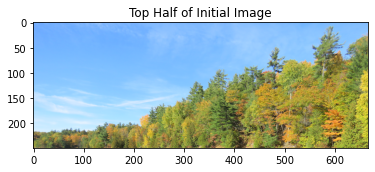

In [20]:
# Cropping to the top half of the image

top_half = image[:int(image.shape[0]/2),:,:] # Assumed: the 'image' requested is the original (not the grayscale).

# Showing the cropped image for diagnostic purposes
plt.imshow(top_half)
plt.title('Top Half of Initial Image')
plt.show()

# Saving the cropped image
plt.imsave('img_crop.png', top_half)

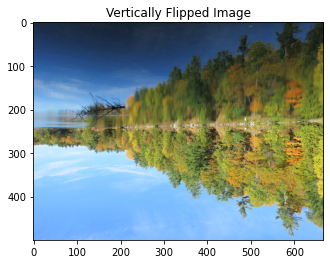

In [22]:
# Flipping the Image Vertically (About a line half way down the page)

img_flipped = np.flip(image, 0) # Flipping the image's 0th axis (y-axis)

# Showing the image for diagnostic purposes

plt.imshow(img_flipped)
plt.title('Vertically Flipped Image')
plt.show()

# Saving image

plt.imsave('img_flip_vert.png', img_flipped)